# Camera Calibration Methods

In [607]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob
import sys
import os

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

## Naive

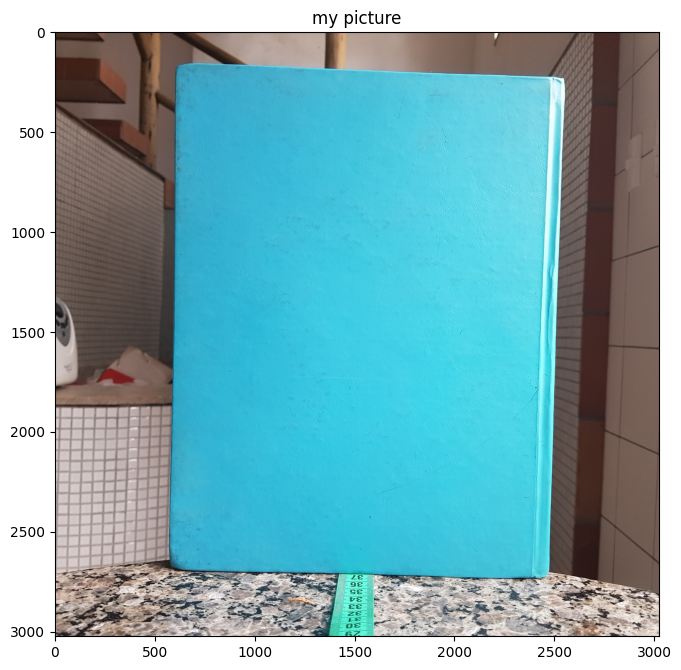

In [608]:
image = cv2.imread("Livro.jpg")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(gray)
plt.title('my picture')
plt.show()

The image above have:

    width=3021px
    heigth=3021px
   
 The book in the image have:
 
    width=1938px
    heigth=2542px

The real size of the book is:
    
    width=22.85cm
    height=28.4cm
    
And its center is located about 37cm from the camera position.

That being, we can aproximate:

    fx = 37*(1938/22.85)


In [609]:
fx = 37*(1938/22.85)
fx

3138.1181619256013

In [610]:
fy = 37*(2542/28.4)
fy

3311.760563380282

In [611]:
cx = 3021/2
cx

1510.5

In [612]:
cy = 3021/2
cy

1510.5

## Octave

Using the Octave Calibration Toolbox (https://github.com/nghiaho12/camera_calibration_toolbox_octave) we obtain:


In [642]:
octave1 = cv2.imread("octave1.png")
octave2 = cv2.imread("octave2.png")
image1  = cv2.imread("image1.jpg")
image1 = cv2.rotate(image1, cv2.cv2.ROTATE_90_CLOCKWISE)

octave3 = cv2.imread("octave3.png")
octave4 = cv2.imread("octave4.png")
octave5 = cv2.imread("octave5.png")

octave1_d = cv2.cvtColor(octave1, cv2.COLOR_BGR2RGB)
octave2_d = cv2.cvtColor(octave2, cv2.COLOR_BGR2RGB)
octave3_d = cv2.cvtColor(octave3, cv2.COLOR_BGR2RGB)
octave4_d = cv2.cvtColor(octave4, cv2.COLOR_BGR2RGB)
octave5_d = cv2.cvtColor(octave5, cv2.COLOR_BGR2RGB)


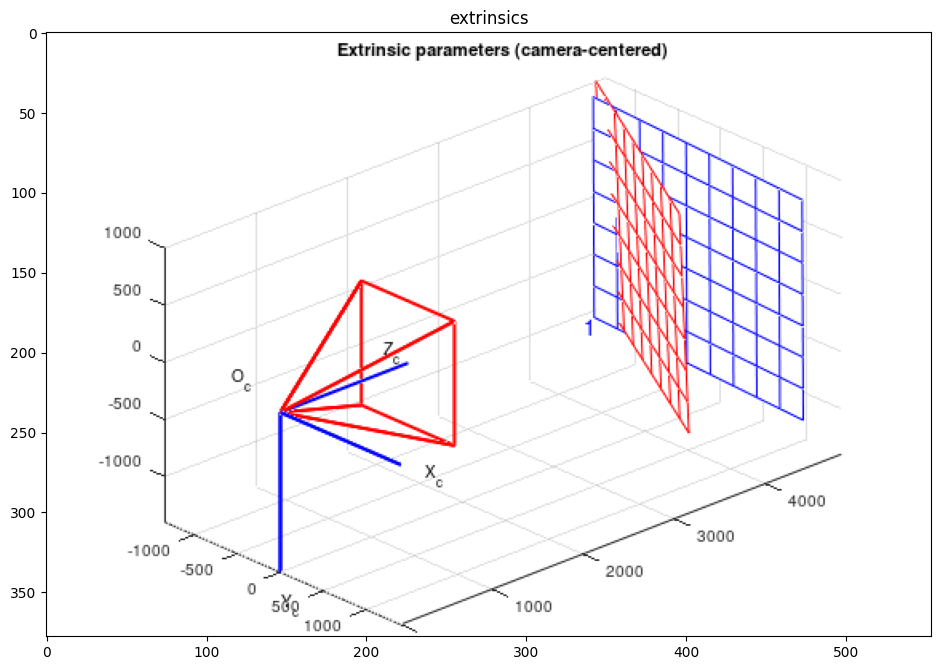

In [643]:
plt.imshow(octave1_d)
plt.title('extrinsics')
plt.show()

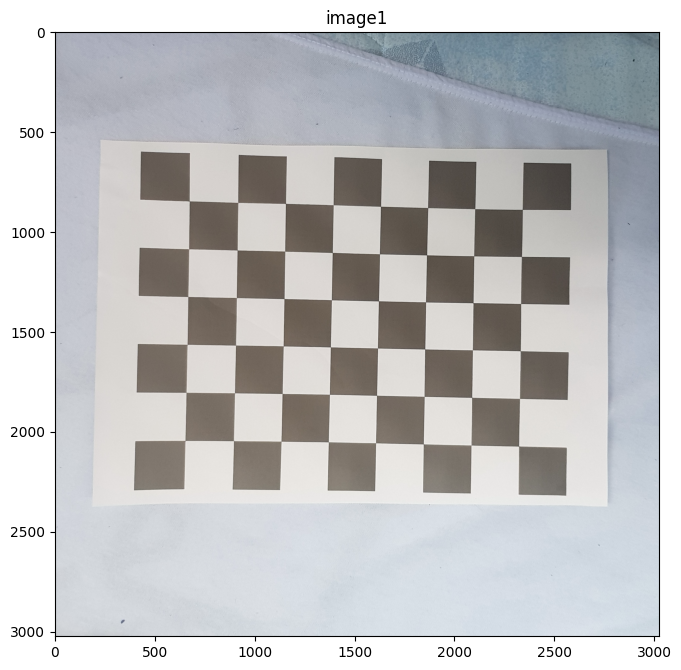

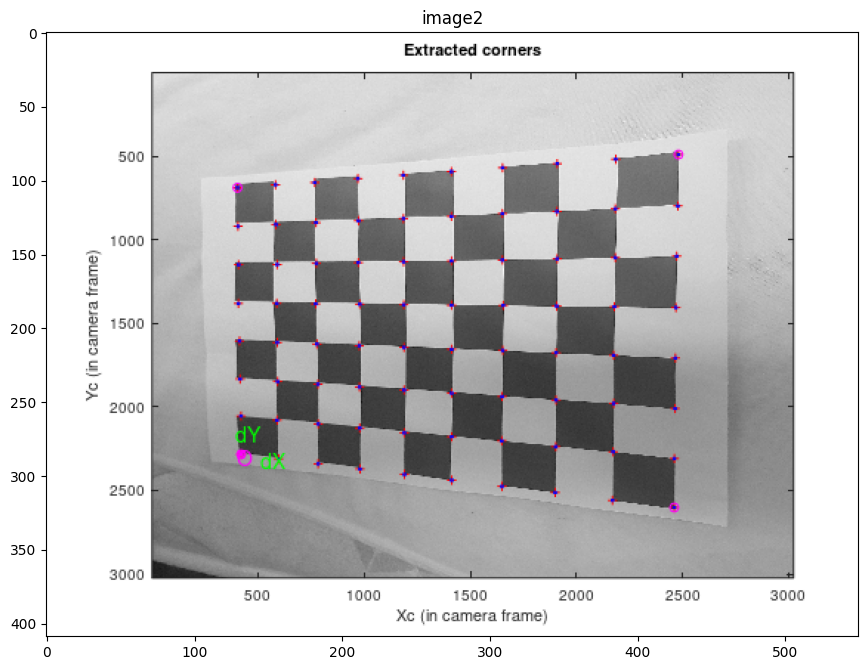

In [644]:
plt.title('image1')
plt.imshow(image1)
plt.show()
plt.title('image2')
plt.imshow(octave2_d)
plt.show()

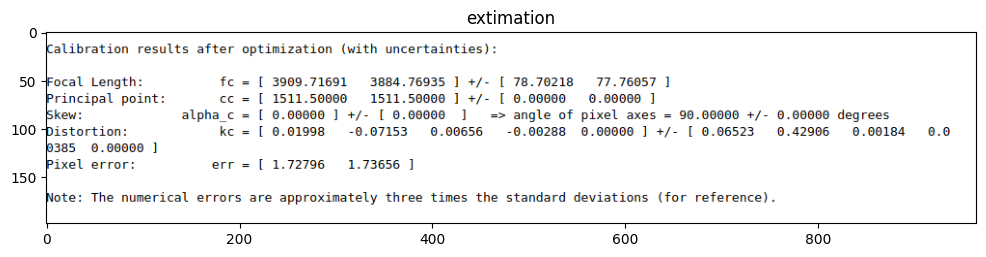

<Figure size 2000x2000 with 0 Axes>

In [645]:
plt.imshow(octave3_d)
plt.title('extimation')
plt.figure(figsize=(20, 20))
plt.show()

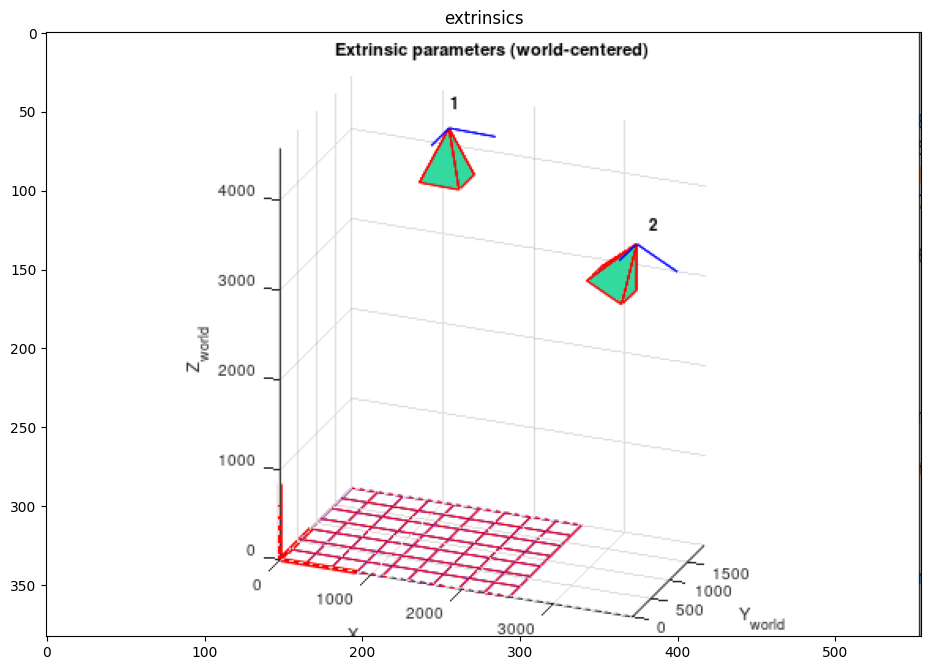

In [646]:
plt.imshow(octave4_d)
plt.title('extrinsics')
plt.show()

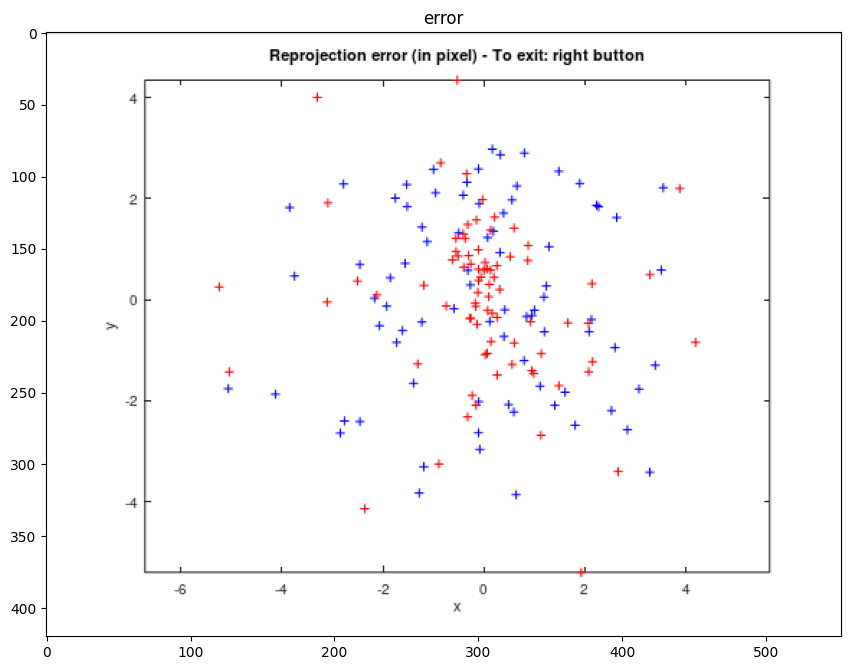

In [647]:
plt.imshow(octave5_d)
plt.title('error')
plt.show()

so we obtain fx = 3909 and fy = 3884 using Octave

## Python

We are gonna use the following image for our calibration

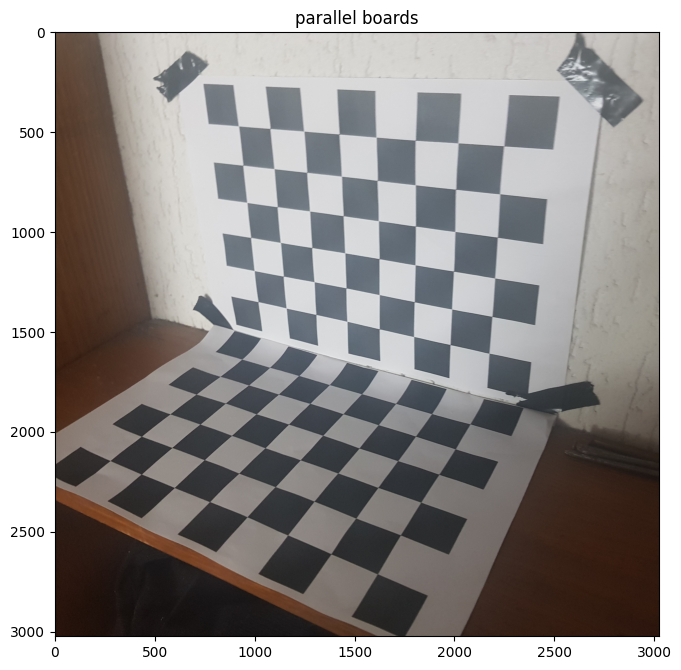

In [677]:
parallel_boards = cv2.imread("image7.jpg")
parallel_boards = cv2.cvtColor(parallel_boards, cv2.COLOR_BGR2RGB)
plt.imshow(parallel_boards)
plt.title('parallel boards')
plt.show()

The image points are:

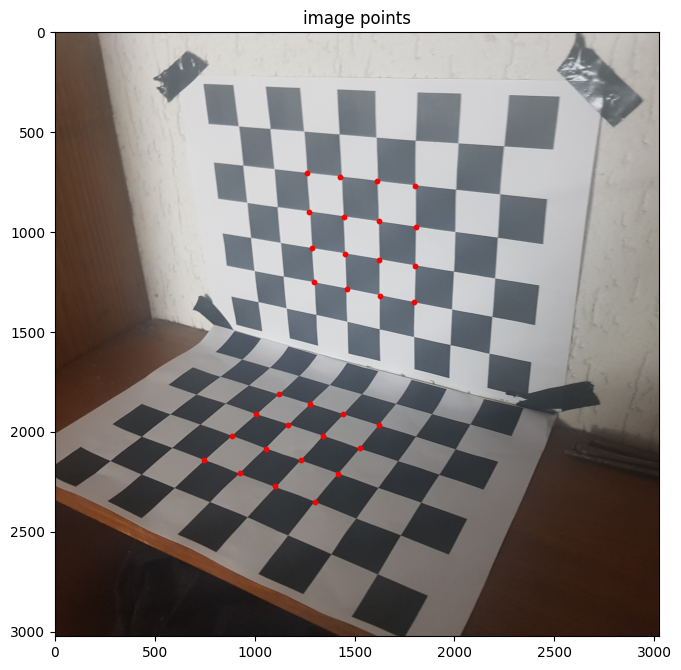

In [649]:
image_points = [
    [748, 2140],
    [884, 2020],
    [1008, 1912],
    [1120, 1812],
    
    [924, 2204],
    [1056, 2084],
    [1168, 1964],
    [1276, 1860],
    
    [1104, 2272],
    [1232, 2140],
    [1342, 2020],
    [1444, 1912],
    
    [1300, 2349],
    [1419, 2211],
    [1525, 2083],
    [1621, 1966],
    
    [1296, 1252],
    [1286, 1080],
    [1274, 898],
    [1262, 706],
    
    [1460, 1284],
    [1452, 1108],
    [1446, 922],
    [1428, 724],
    
    [1625, 1318],
    [1624, 1138],
    [1621, 946],
    [1614, 746],
    
    [1800, 1352],
    [1803, 1168],
    [1806, 974],
    [1805, 768],
]

x = []
y = []

for i in range(len(image_points)):
    x.append(image_points[i][0])
    y.append(image_points[i][1])

plt.imshow(parallel_boards)
plt.title('image points')
plt.scatter(x=x, y=y, c='r', s=10)
plt.show()

The world points, using the first point as the (0,0,0) and units in mm are:

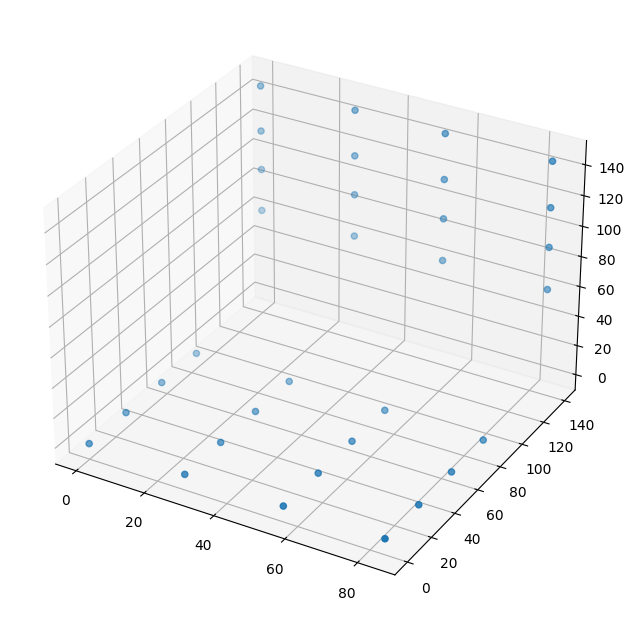

In [650]:
#margin = -23
margin = 7

world_points = [
    [0, 0,  0],
    [0, 28, 0],
    [0, 56, 0],
    [0, 84, 0],
    
    [28, 0,  0],
    [28, 28, 0],
    [28, 56, 0],
    [28, 84, 0],
    
    [56, 0,  0],
    [56, 28, 0],
    [56, 56, 0],
    [56, 84, 0],
    
    [84, 0,  0],
    [84, 28, 0],
    [84, 56, 0],
    [84, 84, 0],
    
    [0, 140, 0  + 54 + margin],
    [0, 140, 28 + 54 + margin],
    [0, 140, 54 + 54 + margin],
    [0, 140, 84 + 54 + margin],
    
    [28, 140, 0  + 54 + margin],
    [28, 140, 28 + 54 + margin],
    [28, 140, 54 + 54 + margin],
    [28, 140, 84 + 54 + margin],    
 
    [54, 140, 0  + 54 + margin],
    [54, 140, 28 + 54 + margin],
    [54, 140, 54 + 54 + margin],
    [54, 140, 84 + 54 + margin],

    [84, 140, 0  + 54 + margin],
    [84, 140, 28 + 54 + margin],
    [84, 140, 54 + 54 + margin],
    [84, 140, 84 + 54 + margin],
]

x = []
y = []
z = []

for i in range(len(world_points)):
    world_points[i] = [world_points[i][0], world_points[i][1], world_points[i][2]]
    x.append(world_points[i][0])
    y.append(world_points[i][1])
    z.append(world_points[i][2])

ax = plt.axes(projection='3d')

ax.scatter3D(x, y, z);

Building the Matrix A as describen in the book by Trucco and Verry, and taking its SVD we have:

In [664]:
A = []

def build_line(image_points, world_points, i):
    return [
        image_points[i][0]*world_points[i][0],
        image_points[i][0]*world_points[i][1],
        image_points[i][0]*world_points[i][2],
        image_points[i][0],
        -1*image_points[i][1]*world_points[i][0],
        -1*image_points[i][1]*world_points[i][1],
        -1*image_points[i][1]*world_points[i][2],
        -1*image_points[i][1],
    ]

for i in range(len(image_points)):
    A.append(build_line(image_points, world_points, i))

SVD = np.linalg.svd(A, full_matrices=True)

In [665]:
v = SVD[2][SVD[1].argmin()]

The minimum eigen value is

In [678]:
min(SVD[1])

21.962894235209138

The corresponding eigen vector is:

In [679]:
v

array([-1.26663782e-04, -4.31845159e-04, -3.53728068e-03,  9.43094446e-01,
        2.17897154e-03,  2.69185466e-03, -2.99920859e-04,  3.32487694e-01])

The gamma parameter, given by Trucco and Verri, is given by:

In [680]:
y = np.sqrt(v[0]**2 + v[1]**2 + v[2]**2)
y

0.0035657942450506293

The alpha\*gamma parameter, given by Trucco and Verri, is given by:

In [669]:
ay = np.sqrt(v[4]**2 + v[5]**2 + v[6]**2)
ay

0.0034761977784463077

The alpha(aspect ratio) parameter is given by:

In [670]:
a = ay/y
a

0.9748733492604957

The rows of the intrinsic matrix can by recovered by:

In [671]:
r = np.zeros((3,3))

r[1,0] = v[0]/y
r[1,1] = v[1]/y
r[1,2] = v[2]/y

Ty     = v[3]/y

r[0,0] = v[4]/ay
r[0,1] = v[5]/ay
r[0,2] = v[6]/ay

Tx     = v[7]/ay

l0 = [r[0,0], r[0,1], r[0,2]]
l1 = [r[1,0], r[1,1], r[1,2]]

l3 = np.cross(l0, l1)

r[2,0] = l3[0]
r[2,1] = l3[1]
r[2,2] = l3[2]

print(r)

print("Tx=",Tx,"Ty", Ty)

[[ 0.62682611  0.77436752 -0.08627842]
 [-0.0355219  -0.12110771 -0.99200359]
 [-0.77862434  0.62487853 -0.04840647]]
Tx= 95.64694402485662 Ty 264.4836974021597


In [672]:
print(image_points[0][0]*(r[0,0]*world_points[0][0] + r[0,1]*world_points[0][1] * r[0,2]*world_points[0][2] + Tx))

71543.91413059275


Because the value is positive we need to invert the values of the first two rows of r and Tx and Ty

In [673]:
r[0,0] = -1 * r[0,0]
r[0,1] = -1 * r[0,1]
r[0,2] = -1 * r[0,2]
r[1,0] = -1 * r[1,0]
r[1,1] = -1 * r[1,1]
r[1,2] = -1 * r[1,2]

Tx = -1*Tx
Ty = -1*Ty
print(r)

[[-0.62682611 -0.77436752  0.08627842]
 [ 0.0355219   0.12110771  0.99200359]
 [-0.77862434  0.62487853 -0.04840647]]


The Tz and fx parameters of the third row can be approximated by:

In [674]:
def build_A_line(image_points, world_points, r, i):
    return [
        image_points[i][0], (r[0,0]*world_points[i][0] + r[0,1]*world_points[i][1] + r[0,2]*world_points[i][2] + Tx),
    ]

A = []
b = []

for i in range(len(image_points)):
    A.append(build_A_line(image_points, world_points, r, i))

A = np.reshape(A,(len(image_points),2))

def build_b_line(image_points, world_points, r, i):
    return [
        -1*image_points[i][0]*(r[2,0]*world_points[i][0] + r[2,1]*world_points[i][1] + r[2,2]*world_points[i][2]),
    ]

for i in range(len(image_points)):
    b.append(build_b_line(image_points, world_points, r, i))

C = np.matmul(np.matmul(np.linalg.inv(np.matmul(A.T,A)),A.T), b)

print("Tz =", C[0])
print("fx =", C[1])
fx = C[1][0]
Tz = C[0]

Tz = [508.28775991]
fx = [3861.17492679]


And fy is given by:

In [675]:
fy = fx/a
fy

3960.693899077562

As we can see, the focal lenght in the x direction (\~3960, \~3861) is very close from the value found by octave (\~3909, \~3884) 

In [676]:
print("fy = ", fy, "fx = ", fx)

fy =  3960.693899077562 fx =  3861.1749267893547


### Conclusions

The difference, and the margin of error in the Octave can be explained by little distortions and the fact that the points where all collected from a check board printed in  a piece of paper that can suffer from small ondulations on its surface.

The most error prone of all the methods addressed was the naive method, and the one that give the bigger difference in absolute value when compared to all the other methods.